# Paradigmas y Programación para Ciencia de Datos - Primer parcial

## Integrantes

- Silva Velázquez Elsy Camila
- Longines Tapia Hugo Didier
- Andrés Urbano Guillermo Gerardo

## 1-Obtén las funciones discriminantes del clasificador determinista y también el estadístico para el conjunto de datos Iris; elige al menos dos conjuntos diferentes de columnas para generar funciones diferentes (10p)

Dataset: Iris 

|sepal length|sepal width|petal length|petal width| clase|
|-----------------|--------|-----------|-----------|------|
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|...|...|...|...|...|



    Number of Instances: 150 (50 in each of three classes).
    Class Distribution: 33.3% for each of 3 classes.

### Librerias

In [167]:
#Clasificador determinista de Euclides
import numpy as np 
from sympy import Matrix, symbols, simplify

### Obtención de los datos

In [209]:
from sklearn import datasets

iris = datasets.load_iris()
# Las caracteristicas tomaremos seran:  petal length y petal width
w1 = iris.data[:, [2]]
w2 = iris.data[:, [3]]

# Dado que son tres clases disitintas para iris, obtendremos un vector con 0,1 y 2
y = iris.target[:]
print('Etiquetas : ' , np.unique(y))
X.shape

Etiquetas :  [0 1 2]


(150, 2)

### Obtén las funciones discriminantes del clasificador determinista

In [210]:
def clasif_e(samples):
    n_samples = len(samples) #Número de clases
    #print(n_samples)
    X = Matrix( [symbols('x'+str(i)) for i in range(samples[0].shape[0])] )
    #print(X)
    fds = [] #almacen de funciones
    for s in samples:
        m = Matrix(np.mean(s, axis=1))
        fds.append( simplify( X.T*m - 0.5*(m.T*m) ) )
    return fds

In [211]:
w1 = w1.T
w2 = w2.T
samples = (w1,w2)
fds = clasif_e(samples)
print(fds)
for fd in range(len(fds)):
    print('fd'+str(fd)+ ' : ',fds[fd].evalf(subs={'x0':3, 'x1':1, 'x2':3, 'x3':1}))

[Matrix([[3.758*x0 - 7.061282]]), Matrix([[1.19933333333333*x0 - 0.719200222222223]])]
fd0 :  Matrix([[4.21271800000000]])
fd1 :  Matrix([[2.87879977777778]])


### Obtén las funciones discriminantes del clasificador estadístico

In [212]:
iris = datasets.load_iris()

# Las caracteristicas tomaremos seran:  sepal length y sepal width
#w1 = iris.data[:, [0]]
# w2 = iris.data[:, [1]]

w1 = iris.data[:, [2]]
w2 = iris.data[:, [3]]

# Dado que son tres clases disitintas para iris, obtendremos
# un vector con 0,1 y 3's en y
y = iris.target[:]
print('Etiquetas : ' , np.unique(y))
X.shape

Etiquetas :  [0 1 2]


(150, 2)

In [213]:
#Clasificador probabilista de Mahalanobis
import numpy as np
from sympy import Matrix, symbols , simplify, log

def clasif_m(samples):
    n_samples = len(samples) #Número de clases
    X = Matrix( [symbols('x'+str(i)) for i in range(samples[0].shape[0])] )
    fds = [] #almacen de funciones
    for s in samples:
        m = Matrix(np.mean(s, axis=1))
        print('Media:\n',m)
        m_cov = np.cov(s, bias=True)
        print('Covarianza:\n',m_cov)
        m_ci = Matrix(m_cov).inv()
        print('Inversa:\n',m_ci)
        fds.append( simplify( (X.T*m_ci*X)/-2 + X.T*m_ci*m - (m.T*m_ci*m)/2 - Matrix([log(m_ci.det())/2]) ) )
    return fds


### 2. Aplica la regla de aprendizaje para los pesos de una neurona artificial basada en el modelo delperceptron que calcule la función booleana XOR de dos parámetros mostrando la evolución delos pesos (8p) Nota: El algoritmo sí termina con pesos inicializados a 0, explica a qué se debe

$$XOR$$

|x1|x2|clase|
|--|---|-----|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|



## Modelo del perceptron

In [6]:
import numpy as np

# Algoritmo supervisado
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):        
        self.eta = eta
        self.n_iter = n_iter
        self.random_state =random_state
        
    def fit(self, X, y):
        """Cuando en realidad el perceptron aprende."""
        rgen = np.random.RandomState(self.random_state)        
        if self.random_state is None:            
            self.w_ = np.zeros(1 + len(X[0])) 
        else:
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        # Lista de errores 
        self.errors_ = []
        # Esta parte de iterar y ver actualizar nuevo pesos se llama 'Epoca'
        for _ in range(self.n_iter):
            errors = 0                        
            for xi, yi in zip(X, y):                                
                update = self.eta * (yi - self.predict(xi))                
                self.w_[1:] += update * xi 
                # x_0 = 1
                self.w_[0] += update * 1                                               
                errors += int(update != 0.0)
            self.errors_.append(errors)
            # Testear
            #print("---Iteración: {} - Lista de errores by iter: {}--".format(_ + 1, self.errors_))            
            print("pesos: ", self.w_)
        return self 
    
    def net_input(self, X):
        """Calcular el producto punto"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """ Predice el perceptrón en el paso actual (funcion activacion, en esta caso funcion escalon 1 a -1)"""                
        return np.where(self.net_input(X) >= 0.0, 1, -1)     

### Obtencion de datos

In [7]:
X =  np.array([[0 ,0], [0 ,1], [1 ,0], [1 ,1]])
y =  np.array([0 ,1 ,1 , 0])

ppn = Perceptron(n_iter =18, eta =0.1, random_state=None)
ppn.fit(X, y)
print('Pesos : %s ' % ppn.w_)

pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
pesos:  [ 0.  -0.1  0.1]
pesos:  [0. 0. 0.]
Pesos : [0. 0. 0.] 


Vemos que al hacer muchar iteración sigen variando, por lo tanto, podemos concluir que no son linealmente separables, al ver la grafica de los puntos, notamos que necesitamos $2$ rectas para separar nuestro conjunto de datos, dado que los estan separados en cada esquina, impidiendo que con una recta pueda dividirlos.


## Visualizando

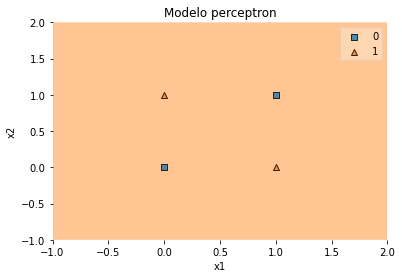

In [14]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X, y, clf=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Modelo perceptron")
plt.show()

## 3 ¿La regresión logística puede separar bien la función booleana XOR de dos parámetros? Argumenta tu respuesta (5p)

In [15]:
# La muestras
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=150.0, random_state=1)
lr.fit(X, y)

LogisticRegression(C=150.0, random_state=1)

### Visualizando

/home/guillermo/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


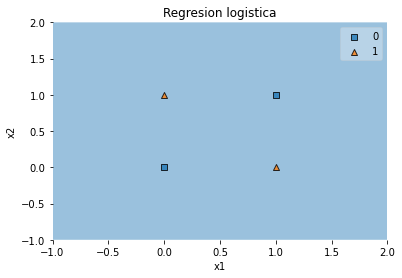

In [19]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X, y, clf=lr)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Regresion logistica")
plt.show()

Vemos que con regresión logistica tampoco pude separar los datos.

## 4. Escribe un pseudocódigo detallado del algoritmo Sequential Forward Selection (5p)

Secuencia hacia adelante es exactamente al reves del SBS

Primero, inicializamos con un conjunto vacio de caracteristicas

Agregamos una columna y nos quedamos con aquella que nos entregue el mayor rendimiento

Agregando una columna a la vez

Agregamos la primera, y vemos cuanto nos entrega de rendimiento, despues quitamos esa y agregamos solo la segunda vemos como le va, así hasta recorrerlas todas

Y nos quedaremos de ellas, con la más grande de todas 


 Despues de esa que nos quedamos, agregamos una segunda columna de las restantes y nos vamos quedando con la mayor y la vamos metiendo en nuestro conjunto de caractaristicas.
 
 
 Es casi igual, pero iniciaciando con un conjunto vacio de caracteristicas y en ese vamos agregando, mientras que con SBS iniciamos con todas y vamos quitando.

El algoritmo puede describirse:


1. Inicializar el algoritmo con k = 0, con un conjunto vacio de caracteristicas .

2. Agregar una caracteristica a $X_k$.

2. Conocer el rendimiento usando el que maximiza el criterio: $x^−$ = arg máx $(J (X_k))$, donde $x$ ∈ $X_k$

3. Agrega la característica $x⁻$ del conjunto: $X_k$ si es el maximo rendimiento.

4. Si k es mayor que el número deseado de características, repetir desde el paso 2; de otro modo, terminar la ejecución

## 5. ¿Qué sucede al utilizar Linear Discriminant Analysis (LDA) sobre el conjunto de medias lunas? Escribe un código que lo muestre (7p)

### Obtencion datos

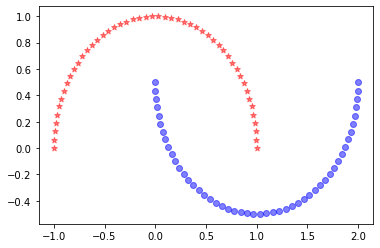

In [31]:
import numpy as np
import matplotlib.pyplot as plt 


from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)


plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='*',
           alpha=0.5)

plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o',
           alpha=0.5)

plt.show()

## Estandarizamos

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_std = sc.fit_transform(X)

### Reduccion LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
# Como este si es supervisado, debemos indicar la y_train
X_lda = lda.fit_transform(X_std, y)

### Visualizando

In [ ]:
fig, ax = plt.subplots (nrows=1, ncols=2, figsize =(10,4))
ax[0].scatter(X_lda[y==0, 0], X_lda[y==0, 0], color='red',
marker='^', alpha =0.5)
ax[0].scatter(X_lda[y==1, 0], X_lda[y==1, 0], color='blue',
marker='o', alpha=0.5)
ax[1].scatter(X_lda[y==0, 0], np.zeros((50,1))+0.02, color='red',
marker='^', alpha =0.5)
ax[1].scatter(X_lda[y==1, 0], np.zeros((50,1))-0.02, color='blue',
marker='o', alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2 ')
ax[1].set_ylim ([-1,1])
ax[0].set_xlabel('PC1 ')
plt.show()

## 6-Escribe un código que utilice KernelPCA con rbf y otra función de kernel para separar círculos concéntricos; compara los resultados con el uso de PCA sobre los mismos datos (10p)

In [57]:
# Datos : círculos concéntricos
from sklearn . datasets import make_circles
X , y = make_circles ( n_samples =1000 , random_state =123 , noise =0.1 , factor =0.2)

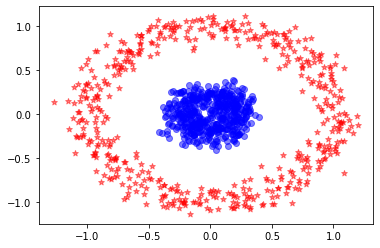

In [58]:
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='*',
           alpha=0.5)

plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o',
           alpha=0.5)

plt.show()

## Reduccion con PCA


In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

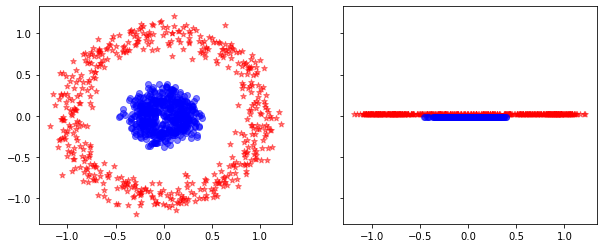

In [120]:
# Haremos subgraficas, una delante de la otra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1], color='red', marker='*',
           alpha=0.5)

ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1], color='blue', marker='o',
           alpha=0.5)

# Mandaremos el resultado de PCA a la derecha, para ver si
# se separa a nuestros conjuntos.
ax[1].scatter(X_pca[y==0,0], np.zeros((500,1))+0.02, color='red', marker='*',
           alpha=0.5)

ax[1].scatter(X_pca[y==1,0], np.zeros((500,1))-0.02, color='blue', marker='o',
           alpha=0.5)

### Reduccion con KPCA

In [37]:
from sklearn.decomposition import KernelPCA

# Le tenememos que indicar que kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

### Visualizando

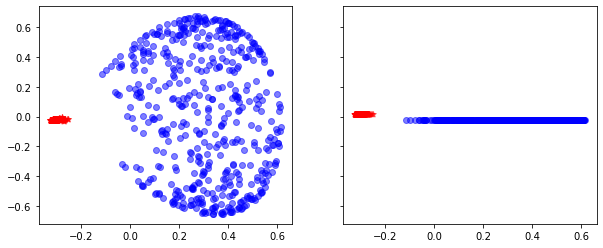

In [108]:
# Haremos subgraficas, una delante de la otra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='*',
           alpha=0.5)

ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o',
           alpha=0.5)

# Mandaremos el resultado de PCA a la derecha, para ver si
# se separa a nuestros conjuntos.
ax[1].scatter(X_kpca[y==0,0], np.zeros((500,1))+0.02, color='red', marker='*',
           alpha=0.5)

ax[1].scatter(X_kpca[y==1,0], np.zeros((500,1))-0.02, color='blue', marker='o',
           alpha=0.5)

Vemos que con KPCA si se pueden seperar linealmente, mientras que con PCA no es posible seperar nuestro conjunto de datos.

# Reduccion con KPCA otro kernel 

In [59]:
from sklearn.decomposition import KernelPCA

# Le tenememos que indicar que kernel
kpca = KernelPCA(n_components=2, kernel='poly', gamma=18)
X_kpca = kpca.fit_transform(X)

## 7 -Elige dos estimadores y demuestra que definen algoritmos escalables (10p)


1. $\bar{X}_{px1} = n^{-1}[\sum_{i=1}^{n}x_{i,1}, \cdots , \sum_{i=1}^{n}x_{i,p} ]$
2. $\hat{\sigma}_j^2 = n^{-1}\sum_{i=1}^n x_{ij}^2 - \bar{x}_j^2$

## Solución 1
1. $\bar{X}_{px1} = n^{-1}[\sum_{i=1}^{n}x_{i,1}, \cdots , \sum_{i=1}^{n}x_{i,p} ]$

Primero hay que recordar algunas cosas. 
Para este caso nuestros datos son representados por el siguiente conjunto:

$D = ({X_1, \cdots , X_n})$ donde $X_i = [x_{i,1}, \cdots, x_{i,p}]^T$

Ya que estamos en un caso donde las observaciones son multivariadas.

Por lo tanto lo primero que hay que hacer es ver que los datos podemos partirlos. Ya que tengamos que la partición de los datos, faltaría demostrar que la media y la varianza se mantienen siendo las mismas. Es decir que nuestra media y varianza pueden ser partidas. 


Si $S(D)= [S_1(D), \cdots, S_d(D)]$ entonces veamos que nuestro conjunto se puede partir de la siguiente forma:

$$S(D_1) + S(D_2) = \begin{bmatrix}  \sum_{i=1}^m x_{i,1}  \\ \vdots \\ \sum_{i=1}^m x_{i,p} \\ m \end{bmatrix} + \begin{bmatrix}  \sum_{i=m+1}^n x_{i,1}  \\ \vdots \\ \sum_{i=m+1}^n x_{i,p} \\ n-m \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^m x_{i,1} + \sum_{i=m+1}^n x_{i,1} \\ \vdots \\ \sum_{i=1}^m x_{i,p} + \sum_{i=m+1}^n x_{i,p} \\ m+n-m\end{bmatrix} $$

Por lo tanto obtenemos: 

$$S(D_1)+S(D_2) = \begin{bmatrix} \sum_{i=1}^n x_{i,1} \\ \vdots \\ \sum_{i=1}^n x_{i,p}\end{bmatrix} = S(D)$$

Entonces si podemos partir nuestros datos de tal forma que al sumarlo nos regresen los datos completos. 

Ahora lo que necesitamos es ver que con esa partición cualquiera, nuestra media de $S(D_1)$ sumada con la media de $S(D_2)$ nos regresa la media total. 

Entonces lo que tenemos que hacer es partir de una $\mu_1$ y $\mu_2$ y ver que al sumarlas nos regresa la formula del ejercicio. Eso con la partición que ya dimos arriba.

Entonces tenemos:
$$\mu_1 + \mu_2 = m^{-1}[\sum_{i=1}^m x_{i,1}, \cdots , \sum_{i=1}^m x_{i,p}] + (n-m)^{-1}[\sum_{i=m+1}^n x_{i,1}, \cdots , \sum_{i=m+1}^n x_{i,p}]$$

$$=[m^{-1}\sum_{i=1}^m x_{i,1} + (n-m)^{-1}\sum_{i=m+1}^n x_{i,1}, \cdots , m^{-1}\sum_{i=1}^m x_{i,p} + (n-m)^{-1}\sum_{i=m+1}^n x_{i,p}]$$

Como podemos observar, lo único que nos falta por hacer es ver que $m^{-1} + (n-m)^{-1} = n^{-1}$ ya que las sumas como ya vimos en $S(D_1) + S(D_2)$ nos daran lo que queremos. 

Entonces demostremos lo siguiente:

$$\frac{1}{m} + \frac{1}{n-m} = \frac{n-m}{m(n-m)} + \frac{m}{m(n-m)} = \frac{n}{m(n-m)}$$

Pero esta igualdad implica lo siguiente:

$$m + (n-m) = \frac{m(n-m)}{n} = n $$ 

Lo cual a su vez al despejar nos lleva a la siguiente conclusión:

$$ \frac{1}{n} = n^{-1} = \frac{n}{m(n-m)} = m^{-1} + (n-m)^{-1}$$

Por lo tanto nuestra suma $m^{-1} + (n-m)^{-1} = n^{-1}$ acabamos de demostrar que es correcta. Esto nos implica directamente que: 

$$\mu_1 + \mu_2 = 
[m^{-1}\sum_{i=1}^m x_{i,1} + (n-m)^{-1}\sum_{i=m+1}^n x_{i,1}, \cdots , m^{-1}\sum_{i=1}^m x_{i,p} + (n-m)^{-1}\sum_{i=m+1}^n x_{i,p}] = [n^{-1}\sum_{i=1}^n x_{i,1}, \cdots, n^{-1}\sum_{i=1}^n x_{i,p}]$$

Por lo tanto llegamos a que:

$$\mu_1 + \mu_2 = n^{-1}[\sum_{i=1}^n x_{i,1}, \cdots, \sum_{i=1}^n x_{i,p}] = \mu = $\bar{X}_{px1}$$

**QED.**


## Solución 2

2. $\hat{\sigma}_j^2 = n^{-1}\sum_{i=1}^n x_{ij}^2 - \bar{x}_j^2$ 

Utilizando la misma partición del ejemplo anterior lo que queremos demostrar es que $\hat{\sigma}_j^2 = \hat{\sigma}_{1j}^2 + \hat{\sigma}_{2j}^2$ donde es la suma de las varianzas de la partición.

Entonces veamos quien es la suma de ambas varianzas:

$$\hat{\sigma}_{1j}^2 + \hat{\sigma}_{2j}^2 =  m^{-1}\sum_{i=1}^m x_{ij}^2 - \bar{x}_j^2 +  (n-m)^{-1}\sum_{i=m+1}^n x_{ij}^2 - \bar{x}_j^2$$

Aquí lo único que tenemos que utilizar es lo que ya demostramos en el ejemplo anterior respecto a $m^{-1} + (n-m)^{-1} = n^{-1}$. Ya en el fondo lo que estamos haciendo es lo siguiente: 

$$\sum_{i=1}^m (m^{-1}) (x_{ij}^2 - \bar{x}_j^2) + \sum_{i=m+1}^n ((n-m)^{-1}) (x_{ij}^2 - \bar{x}_j^2) = \sum_{i=1}^n (m^{-1}) (x_{ij}^2 - \bar{x}_j^2) + ((n-m)^{-1}) (x_{ij}^2 - \bar{x}_j^2)  $$

$$ = \sum_{i=1}^n (n^{-1})(x_{ij}^2 - \bar{x}_j^2) = n^{-1}\sum_{i=1}^n x_{ij}^2 - \bar{x}_j^2  $$

Por lo tanto:

$$\hat{\sigma}_{1j}^2 + \hat{\sigma}_{2j}^2 =  n^{-1}\sum_{i=1}^n x_{ij}^2 - \bar{x}_j^2 = \hat{\sigma}_{j}^2 $$

**QED**.


## 8. Obtén las expresiones para determinar los intervalos de contenedores para histogramas bidimensionales en función del número de contenedores (5p)

Sea, $a=x(n)-x(1)$ y $b=y(n)-y(1)$  y $h$ el número de intervaos deseados; podemos definir los intervalos como:

$$
C_{i}(h) = A \times B = \left\{
\begin{array}{r}
\left[x_{1}, x_{1}+\frac{a}{h}\right] \times \left[y_{1}, y_{1}+\frac{b}{h}\right], \hspace{1cm} \text{si i es 1 }\\
\left(x_{1}+(i-1) \frac{a}{h}, x_{1}+(i) \frac{a}{h}\right] \times \left(y_{1}+(i-1) \frac{b}{h}, y_{1}+(i) \frac{b}{h}\right], \hspace{1cm} \text{en otro caso} 
\end{array}
\right.
$$

Esto, ya que como vimos en clase, los intervalos de un histograma para 1 dimensión están dados por: 

$$
\begin{aligned}
a_{1}=&\left[x_{1}, x_{1}+\frac{a}{h}\right] \\
& \vdots \\
a_{i}=&\left(x_{1}+(i-1) \frac{a}{h}, x_{1}+(i) \frac{a}{h}\right] \\
& \vdots \\
a_{h}=&\left(x_{1}+(h-1) \frac{a}{h}, x_{n}\right]
\end{aligned}
$$

$$
\begin{aligned}
b_{1}=&\left[y_{1}, y_{1}+\frac{b}{h}\right] \\
& \vdots \\
b_{i}=&\left(y_{1}+(i-1) \frac{b}{h}, y_{1}+(i) \frac{b}{h}\right] \\
& \vdots \\
b_{h}=&\left(y_{1}+(h-1) \frac{b}{h}, y_{n}\right]
\end{aligned}
$$



$$
B=\left\{\left(b_{1}\right), \ldots,\left(b_{h}\right)\right\}
$$

$$
A=\left\{\left(a_{1}\right), \ldots,\left(a_{h}\right)\right\}
$$

(-4.534459567552757, -3.4081006962585834)
(-3.4081006962585834, -2.28174182496441)
(-2.28174182496441, -1.1553829536702365)
(-1.1553829536702365, -0.02902408237606302)
(-0.02902408237606302, 1.0973347889181104)
(1.0973347889181104, 2.223693660212284)
(5.244468669344802, -5.891785174828679)
(5.244468669344802, -3.107721713785309)
(5.244468669344802, -0.3236582527419385)
(5.244468669344802, 2.460405208301432)


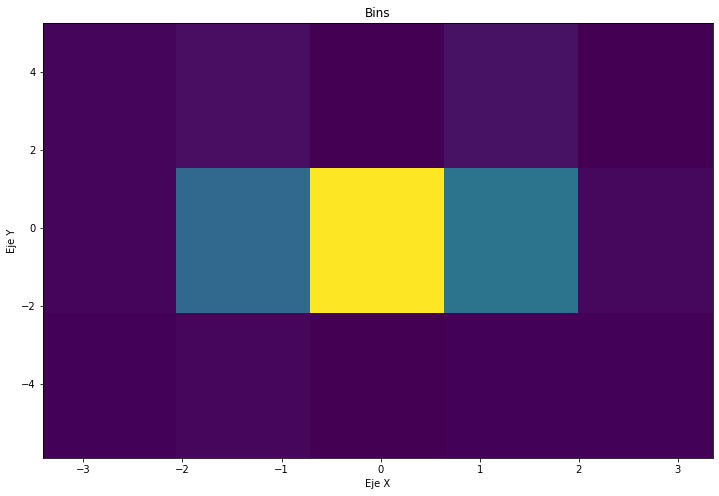

In [172]:
#Obtén las expresiones para determinar los intervalos de contenedores para histogramas bidimensionales en función del número de contenedores

import numpy as np
import matplotlib.pyplot as plt
import random

#Obtengamos un conjunto de datos para probar el histograma
x = np.random.normal(size = 1000)
y = x * np.random.normal(size = 1000)  #Usamos la distribución normal

#Definamos los bins
x_min = np.min(x)        #Mínimo del intervalo en el eje X
y_min = np.min(y)        #Mínimo del intervalo en el eje Y 

x_max = np.max(x)        #Máximo del intervalo en el eje X
y_max = np.max(y)        #Máximo del intervalo en el eje Y

#Queremos tener 15 contenedores, 5 intervalos en el eje X y 3 en el eje Y
n_x = 5      #Núm de intervalos en el eje X
n_y = 3      #Núm de intervalos en el eje Y

x_bins = np.linspace(x_min, x_max, 6)     
y_bins = np.linspace(y_min, y_max, 4)       #Obtenemos contenedores

#Mostramos intervalos obtenidos
len_x = (x_max -x_min)/6       #Definimos longitud de intervalos en X
len_y = (y_max -y_min)/4      #Definimos longitud de intervalos en Y

for i in range(n_x +1):   
  b_xi = (x_min +(i-1)*len_x, x_min +i*len_x)
  print(b_xi)

for j in range(n_y +1):  
  b_yi = (y_min +(i-1)*len_y, y_min +j*len_y)
  print(b_yi)

fig, ax = plt.subplots(figsize = (12,8))

#Creamos histograma 
plt.hist2d(x, y, bins = [x_bins, y_bins])
plt.title('Bins')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

plt.show()

## 9- Un resorte se somete a estiramiento aplicando distintos pesos (X) y se anotó su alargamiento (y); la solución de la ecuación normal, determina los estimadores


9. Datos:
$$
\begin{aligned}
&\mathbf{X}=[0.3, 0.64, 0.99, 1.33, 1.67, 2.01, 2.36, 2.7] \\
&\mathbf{y}=[0.15, 0.11, 0.2, 0.43, 0.39, 0.62, 0.72, 0.81]
\end{aligned}
$$

Al calcular $\mathbf{X}^{T} \mathbf{X}$ y su inversa, hacemos $\boldsymbol{L}=\boldsymbol{m} \boldsymbol{F}+\boldsymbol{n} \text { para un mejor ajuste de los datos. }$

sabemos que:

$$
\begin{gathered}
\hat{\boldsymbol{\beta}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y} \\
\sigma_{\epsilon}^{2}=\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{n-q} \\
\operatorname{var}(\hat{\boldsymbol{\beta}})=\sigma_{\epsilon}^{2}\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1}
\end{gathered}
$$

$\hat{\boldsymbol{\beta}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y}$

Primero

$$
\mathbf{X}^{T} \mathbf{X} = \left(\begin{array}{llllllll}
\frac{3}{10} & \frac{16}{25} & \frac{99}{100} & \frac{133}{100} & 1.67 & 2.01 &2.36 & 2.7 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1
\end{array}\right) \cdot
\left(\begin{array}{ll}
\frac{3}{10} & 1 \\
\frac{64}{100} & 1 \\
\frac{99}{100} & 1 \\
\frac{133}{100} & 1 \\
1.67 & 1 \\
2.01 & 1 \\
2.36 & 1 \\
2.7 & 1
\end{array}\right)=
\left(\begin{array}{cc}
22.9372 & 12 \\
12 & 8
\end{array}\right)
$$

$\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1}$




In [9]:
import numpy as np

X=[[0.3,0.64,0.99,1.33,1.67,2.01, 2.36, 2.7],[1,1,1,1,1,1,1,1]]
y=[[0.15,0.11,0.02,0.43,0.39, 0.62, 0.72, 0.81]]

X = np.array(X).T
y = np.array(y).T
y

array([[0.15],
       [0.11],
       [0.02],
       [0.43],
       [0.39],
       [0.62],
       [0.72],
       [0.81]])

In [6]:

X1 = np.dot(X.T, X)
X1

[[0.3  0.64 0.99 1.33 1.67 2.01 2.36 2.7 ]
 [1.   1.   1.   1.   1.   1.   1.   1.  ]]


array([[22.9372, 12.    ],
       [12.    ,  8.    ]])

In [4]:
# Inversa

X1 = np.linalg.inv(X1)
print(X1)

X2 = np.dot(X.T, y)
X2

B = np.dot(X1, X2)
B

[[ 0.20254395 -0.30381593]
 [-0.30381593  0.58072389]]


array([[ 0.32727052],
       [-0.08465578]])

$\sigma_{\epsilon}^{2}=\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{n-q}$,  donde $\hat{y}=\mathbf{x}_{i}^{T} \hat{\boldsymbol{\beta}}$

In [51]:
# Calculamos Y-gorrito

yv = []
for i in range(len(X)):
    yv.append(list(np.dot(X[i].T, B)))

yv

[[0.013525378757190329],
 [0.12479735477598641],
 [0.23934203597180587],
 [0.350614011990602],
 [0.46188598800939806],
 [0.5731579640281941],
 [0.6877026452240136],
 [0.7989746212428097]]

In [52]:
# Calculamos la suma
sumas = []
for i in range(len(y)):
    sumas.append((y[i]-yv[i])**2)
    
sigma = sum(sumas)/(len(X) - len(X.T))
sigma

array([0.01363063])

$\operatorname{var}(\hat{\boldsymbol{\beta}})=\sigma_{\epsilon}^{2}\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1}$

In [54]:
# Calculamos la varianza

var = sigma * X1
var

array([[ 0.0027608 , -0.0041412 ],
       [-0.0041412 ,  0.00791563]])